In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV data into a DataFrame
data = pd.read_csv('../data/home.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 16 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Score                                                                                 3034 non-null   int64 
 1   8. Do you have good relationship with your parents?                                   3034 non-null   object
 2   10. Do you suffer from unhealthy lifestyle?                                           3034 non-null   object
 3   11. Do you get distracted by gadgets and mobile phones?                               3034 non-null   object
 4   12. Do you interested to do your educational work at home?                            3034 non-null   object
 5   13. Do you go to tuition class or personal classes?                                   3034

In [4]:
# Display the first few rows of the DataFrame
(data.head(1))

,Score,8. Do you have good relationship with your parents?,10. Do you suffer from unhealthy lifestyle?,11. Do you get distracted by gadgets and mobile phones?,12. Do you interested to do your educational work at home?,13. Do you go to tuition class or personal classes?,16. Do you worried about financial condition of your family?,18. Do your parents get personal involvement in your development?,2. Are you satisfied with your residency facility?,4. Are you satisfied with Parent's contribution in your educational performance,6. Arer you satisfied with Personal transportation to school?,7. what do you feel by society pressure in educational performance?,8. What do you feel by family pressure in educational performance?,12. Are you satisfied with residency in urban area for your educational performance?,13. Are you satisfied with residency in rural area for your educational performance,15. Are you satisfied with the atmosphere at home for your educational performance?
0,91,No,No,No,No,No,No,Yes,highly satisfied,highly satisfied,highly satisfied,Neutral,Neutral,highly satisfied,highly satisfied,highly satisfied


In [5]:
unique_scores = sorted(data['Score'].unique())
print(unique_scores)


[51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 69, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]


In [6]:
len(data['Score'].unique())

43

## Het map

In [7]:
# Convert categorical columns to one-hot encoding
categorical_columns = ['2. Are you satisfied with your residency facility?',
                        '4. Are you satisfied with Parent\'s contribution in your educational performance',
                        '6. Arer you satisfied with Personal transportation to school?',
                        '7. what do you feel by society pressure in educational performance?',
                        '8. What do you feel by family pressure in educational performance?',
                        '12. Are you satisfied with residency in urban area for your educational performance?',
                        '13. Are you satisfied with residency in rural area for your educational performance',
                        '15. Are you satisfied with the atmosphere at home for your educational performance?']

data_encoded = pd.get_dummies(data, columns=categorical_columns)
data_encoded.head()

,Score,8. Do you have good relationship with your parents?,10. Do you suffer from unhealthy lifestyle?,11. Do you get distracted by gadgets and mobile phones?,12. Do you interested to do your educational work at home?,13. Do you go to tuition class or personal classes?,16. Do you worried about financial condition of your family?,18. Do your parents get personal involvement in your development?,2. Are you satisfied with your residency facility?_Neutral,2. Are you satisfied with your residency facility?_Satisfied,...,12. Are you satisfied with residency in urban area for your educational performance?_highly satisfied,13. Are you satisfied with residency in rural area for your educational performance_Dis-satisfied,13. Are you satisfied with residency in rural area for your educational performance_Neutral,13. Are you satisfied with residency in rural area for your educational performance_Satisfied,13. Are you satisfied with residency in rural area for your educational performance_highly Dis-satisfied,13. Are you satisfied with residency in rural area for your educational performance_highly satisfied,15. Are you satisfied with the atmosphere at home for your educational performance?_Neutral,15. Are you satisfied with the atmosphere at home for your educational performance?_Satisfied,15. Are you satisfied with the atmosphere at home for your educational performance?_highly Dis-satisfied,15. Are you satisfied with the atmosphere at home for your educational performance?_highly satisfied
0,91,No,No,No,No,No,No,Yes,False,False,...,True,False,False,False,False,True,False,False,False,True
1,90,No,No,No,No,No,No,Yes,False,False,...,True,False,False,False,False,True,False,False,False,True
2,80,No,No,No,No,No,No,Yes,False,False,...,True,False,False,False,False,True,False,False,False,True
3,80,No,No,No,No,No,No,Yes,False,True,...,False,False,False,False,False,True,False,False,False,True
4,80,No,No,No,No,No,No,Yes,False,True,...,False,False,False,False,False,True,False,False,False,True


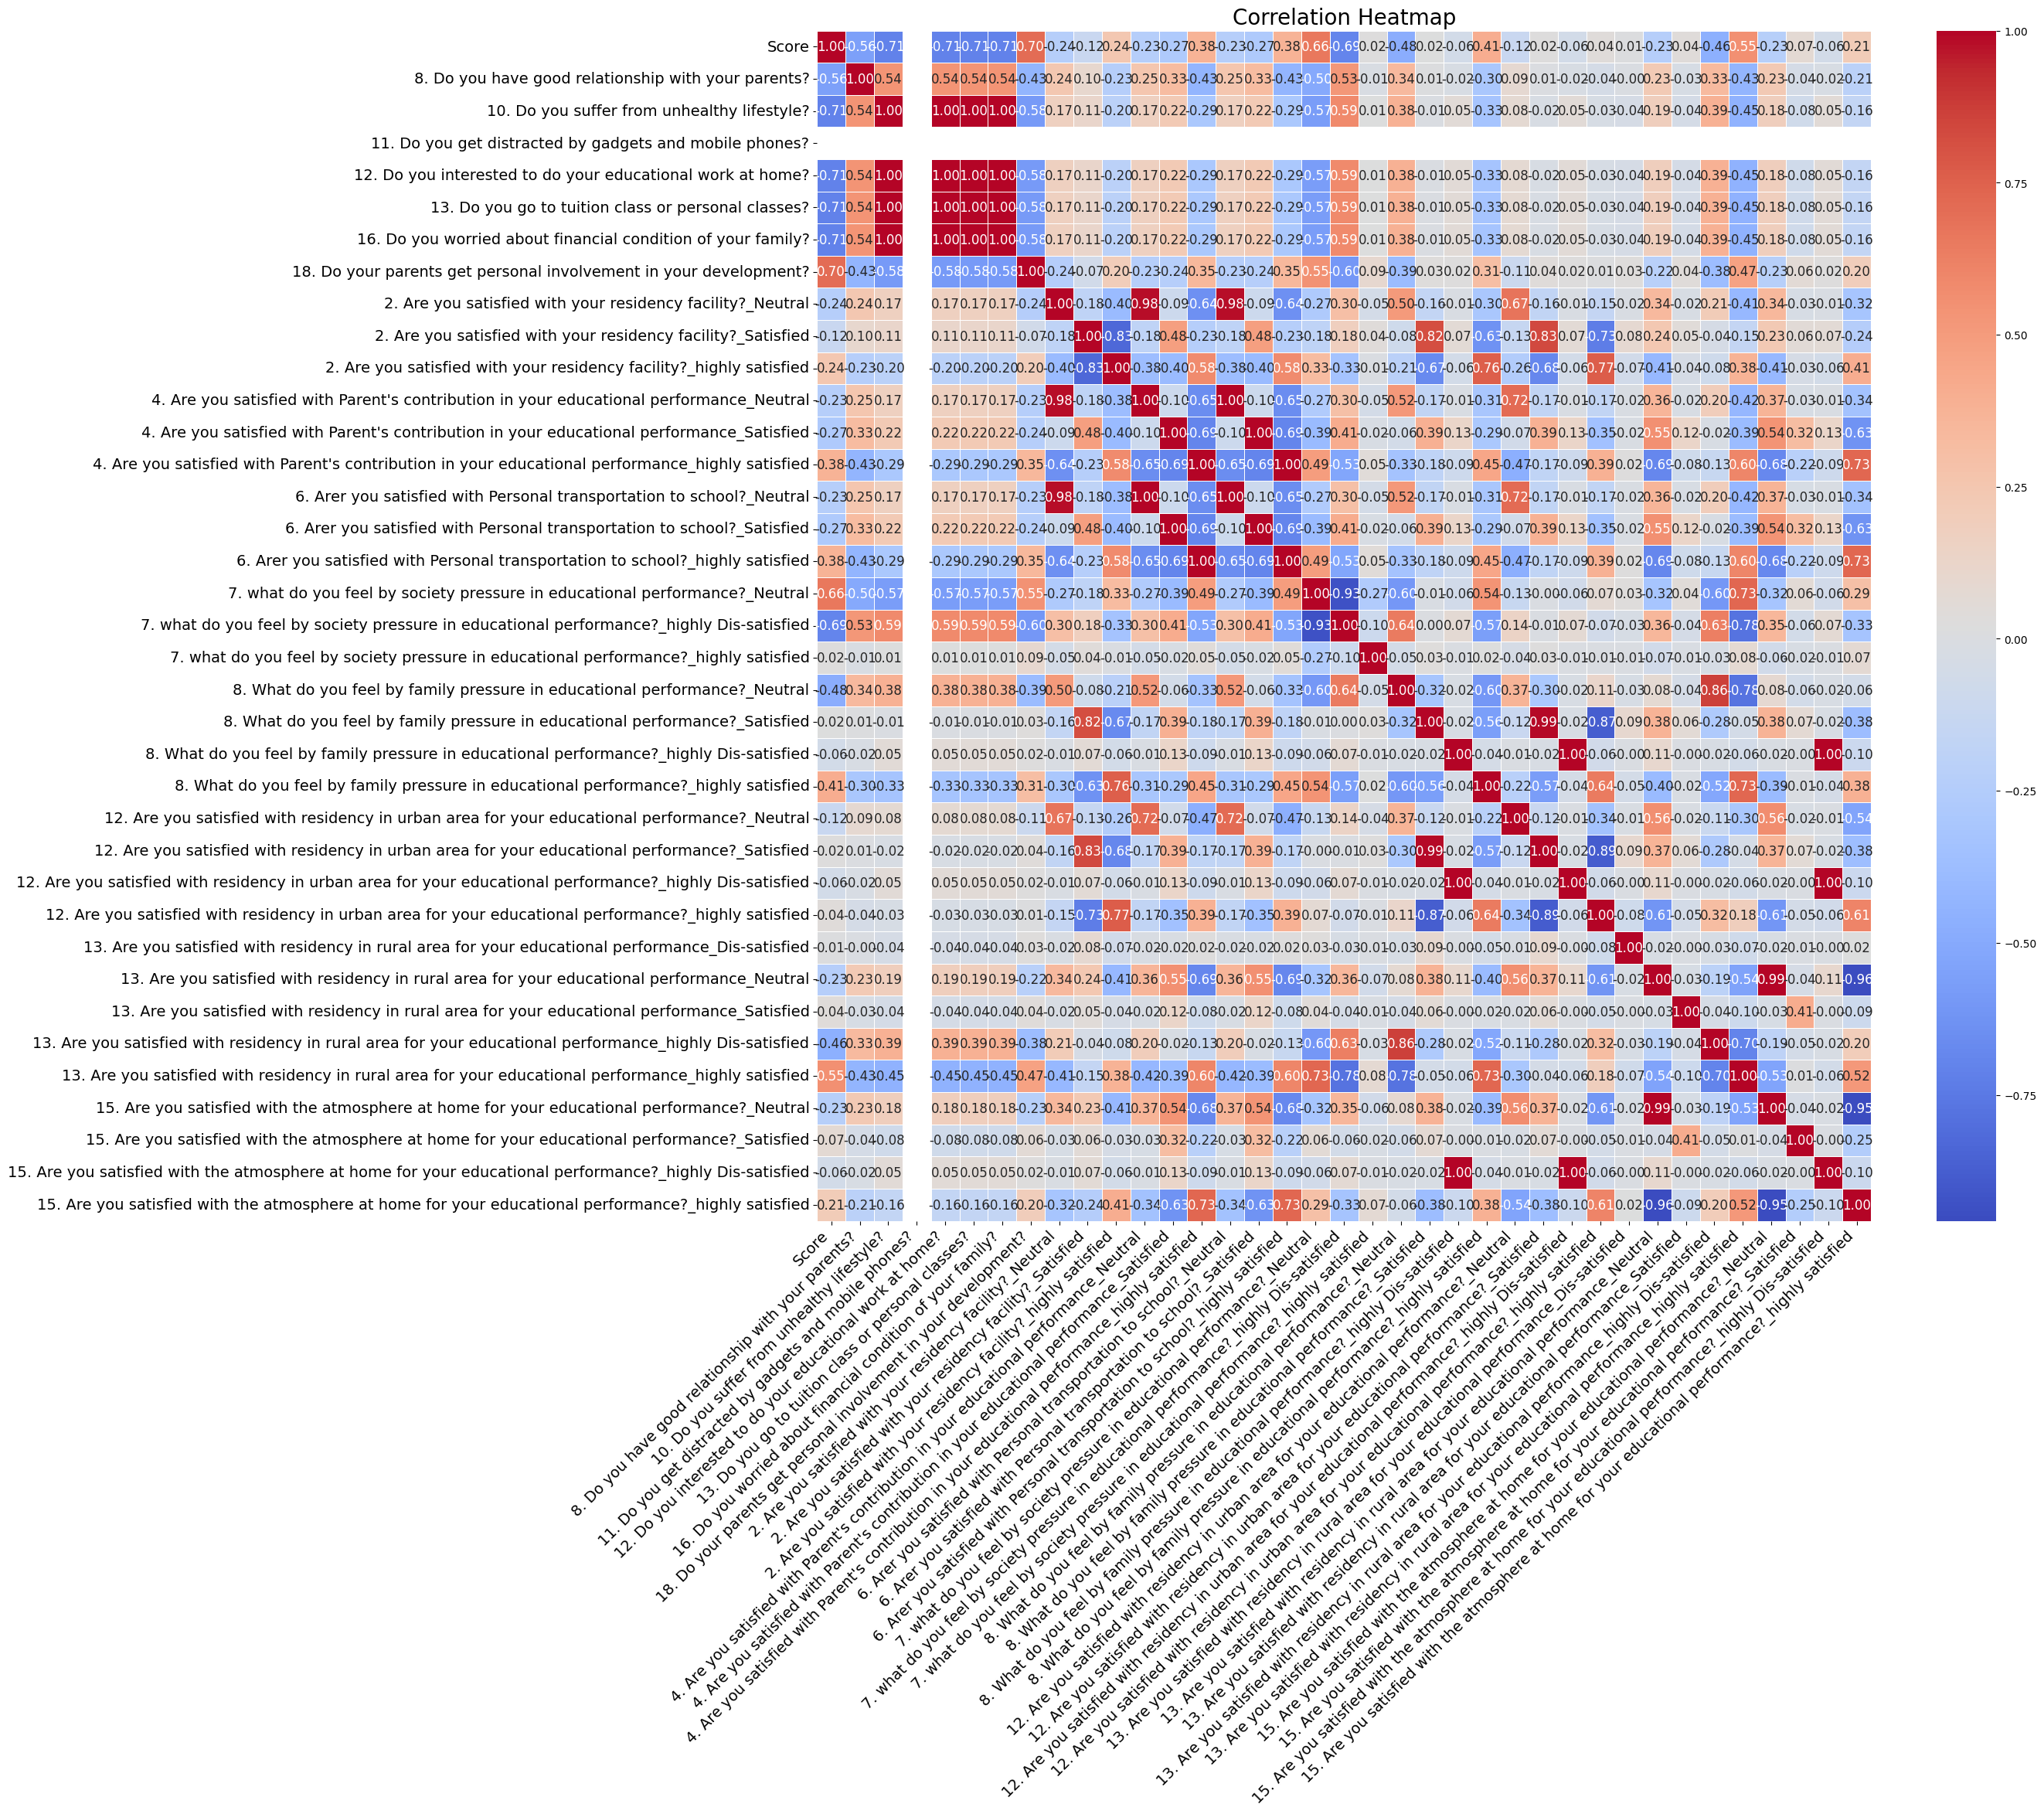

In [8]:
# Manually encode binary columns as 0 and 1
binary_columns = list(data_encoded.columns)[1:]
data_encoded[binary_columns] = data_encoded[binary_columns].replace({'No': 0, 'Yes': 1})

# Create a correlation matrix
correlation_matrix = data_encoded.corr()

# Set up a more advanced heatmap with larger figure size
plt.figure(figsize=(22, 20))

# Create a heatmap with more advanced formatting
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})

# Customize plot aesthetics
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Save the heatmap to a PDF file
heatmap.get_figure().savefig("educational_performance_factors_heatmap.pdf", format="pdf", bbox_inches='tight')

# Display the heatmap
plt.show()

In [10]:
threshold = 0.2  # You can adjust this threshold as needed

# Calculate correlations with 'Score' column
correlation_with_score = correlation_matrix['Score']

# Filter columns based on the threshold
significant_columns = correlation_with_score[(correlation_with_score) > threshold].index

# Display significant columns
print("Columns with correlation above threshold:")
print(significant_columns)

Columns with correlation above threshold:
Index(['Score',
       '18. Do your parents get personal involvement in your development?',
       '2. Are you satisfied with your residency facility?_highly satisfied',
       '4. Are you satisfied with Parent's contribution in your educational performance_highly satisfied',
       '6. Arer you satisfied with Personal transportation to school?_highly satisfied',
       '7. what do you feel by society pressure in educational performance?_Neutral',
       '8. What do you feel by family pressure in educational performance?_highly satisfied',
       '13. Are you satisfied with residency in rural area for your educational performance_highly satisfied',
       '15. Are you satisfied with the atmosphere at home for your educational performance?_highly satisfied'],
      dtype='object')


In [4]:
# Summary statistics
print(data.describe())

             Score
count  3034.000000
mean     77.506592
std       9.735817
min      51.000000
25%      72.000000
50%      80.000000
75%      83.000000
max      98.000000


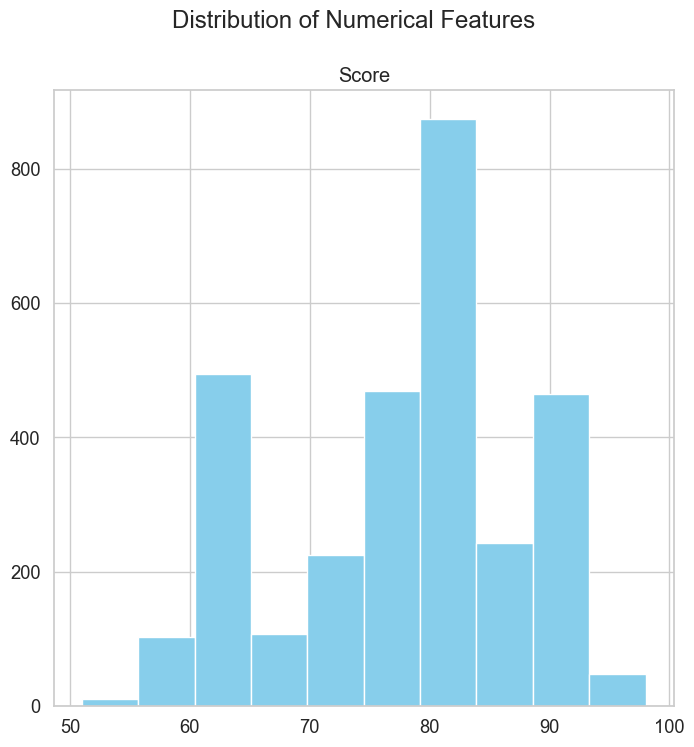

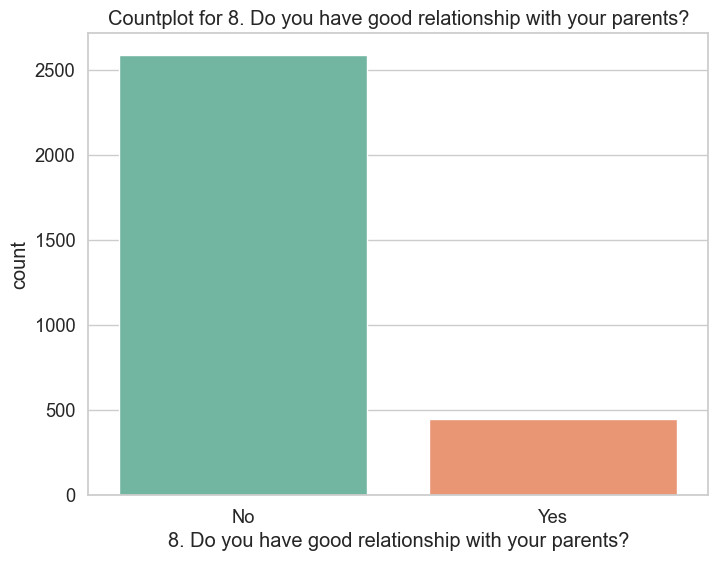

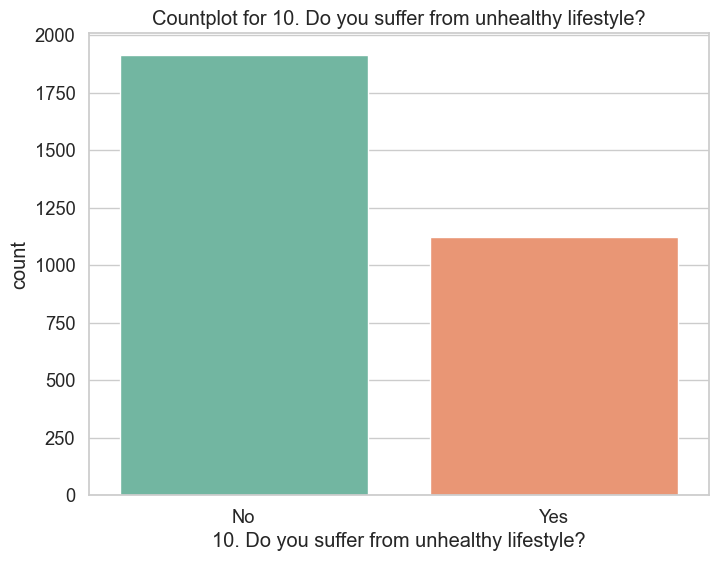

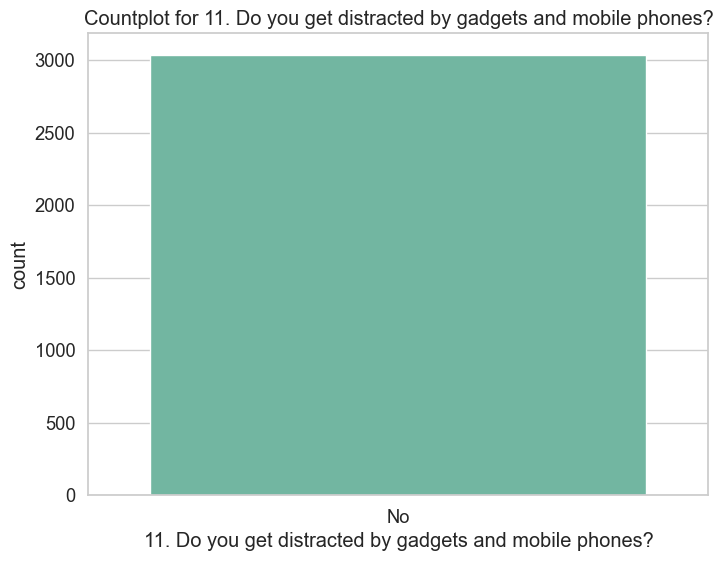

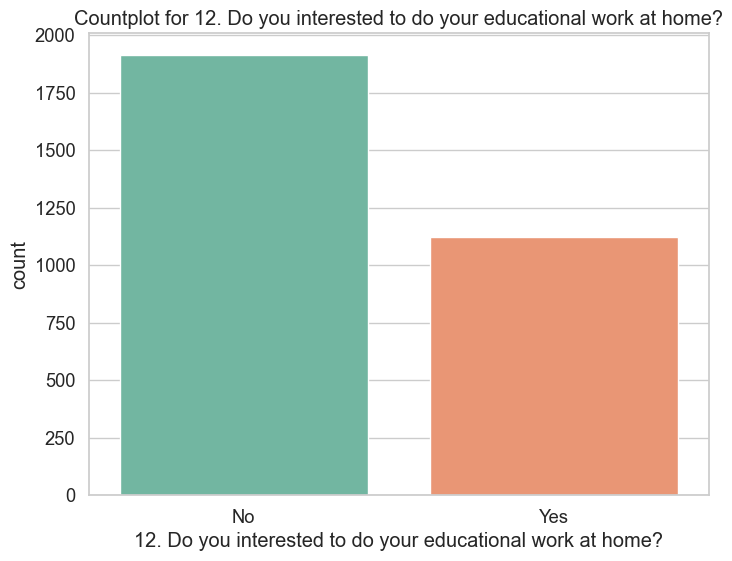

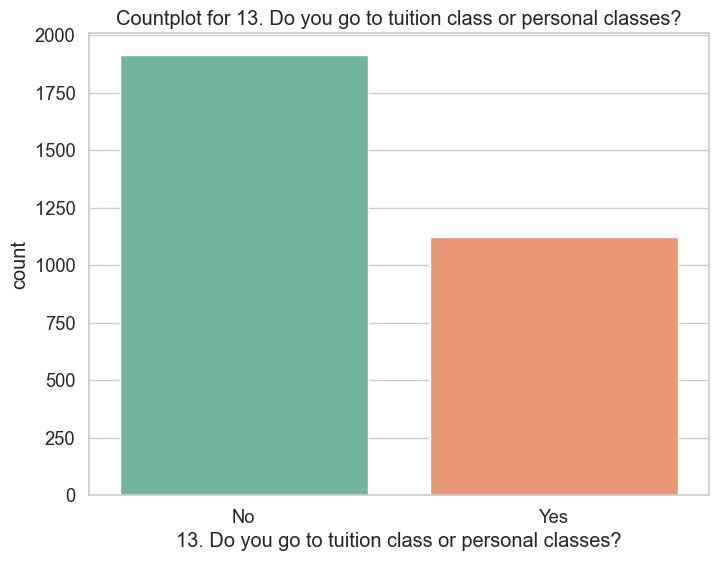

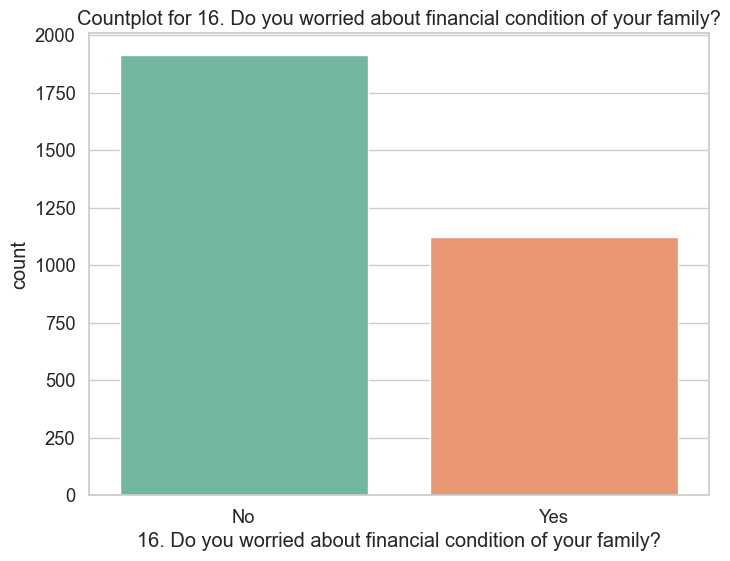

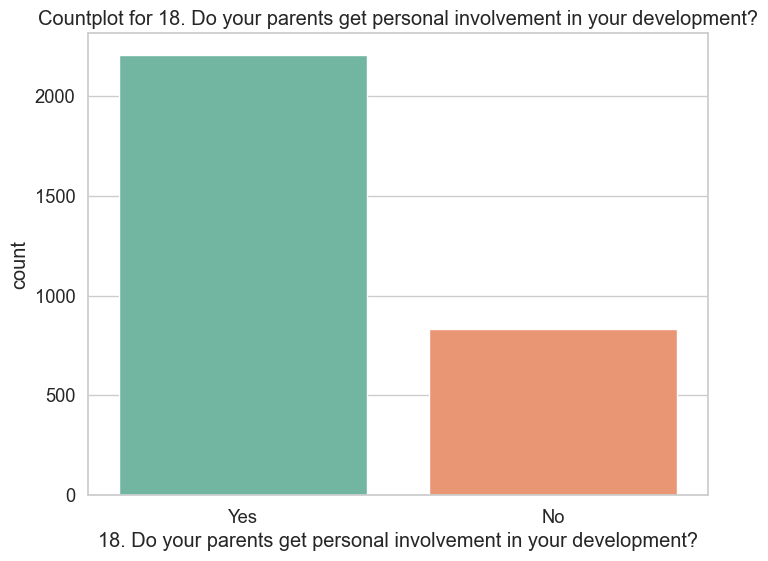

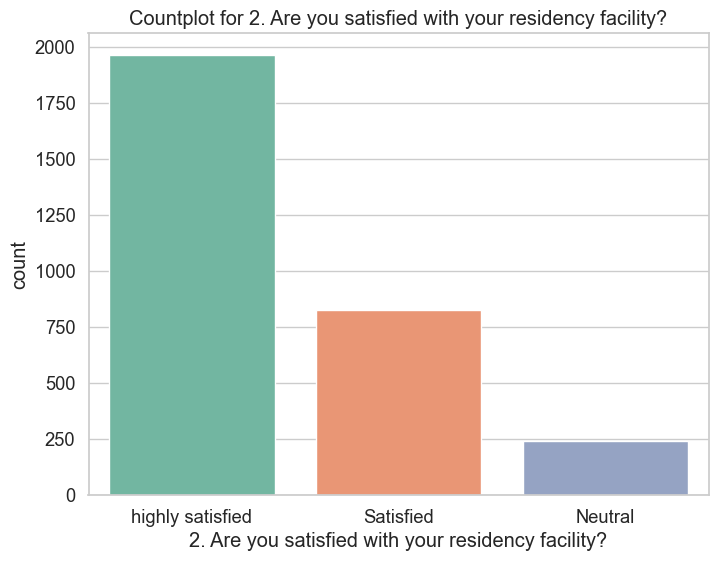

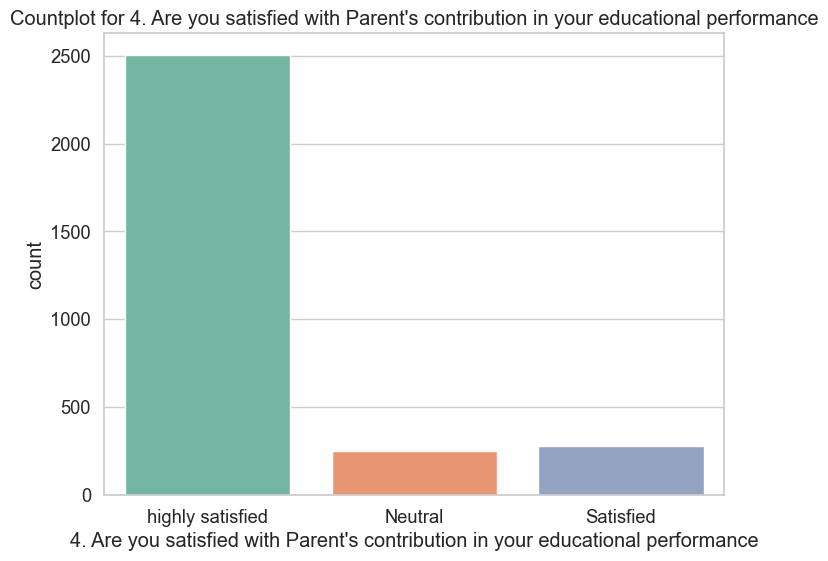

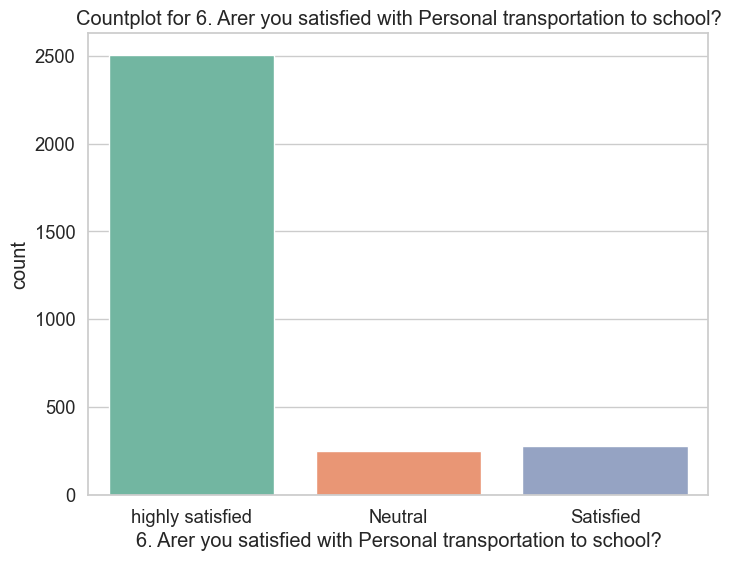

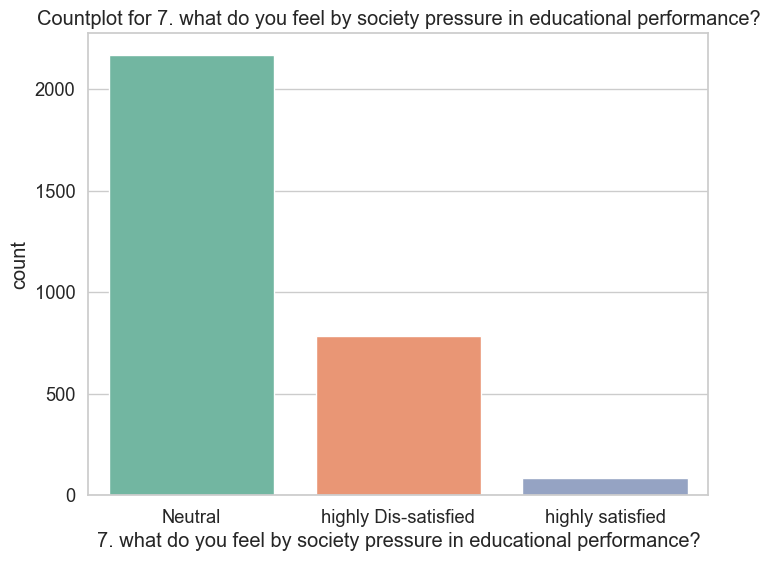

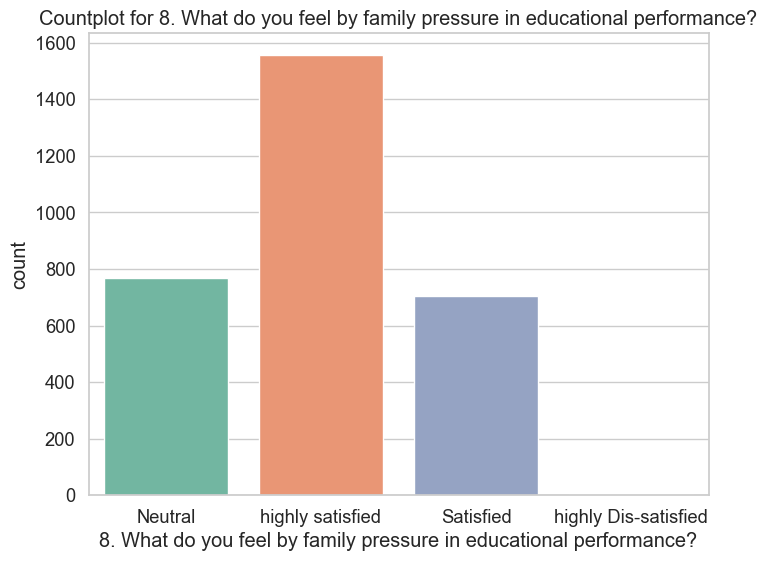

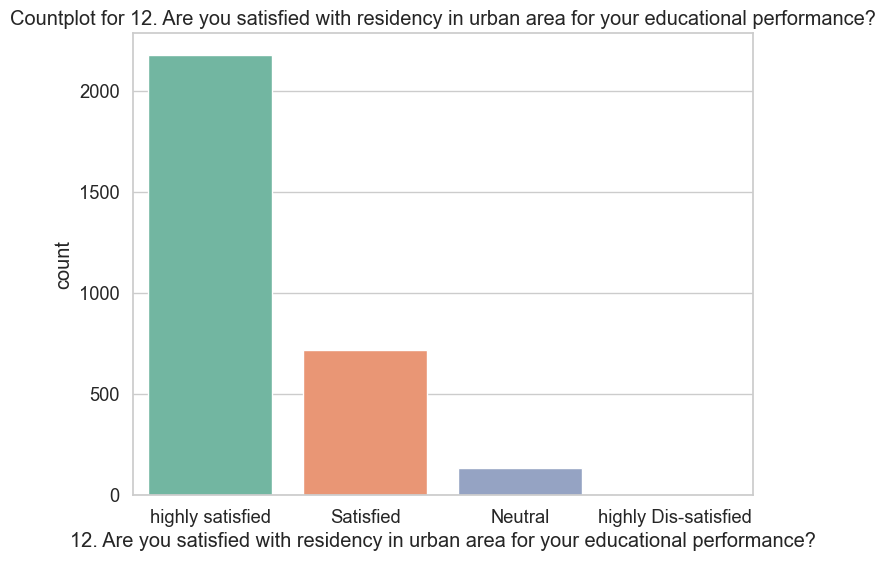

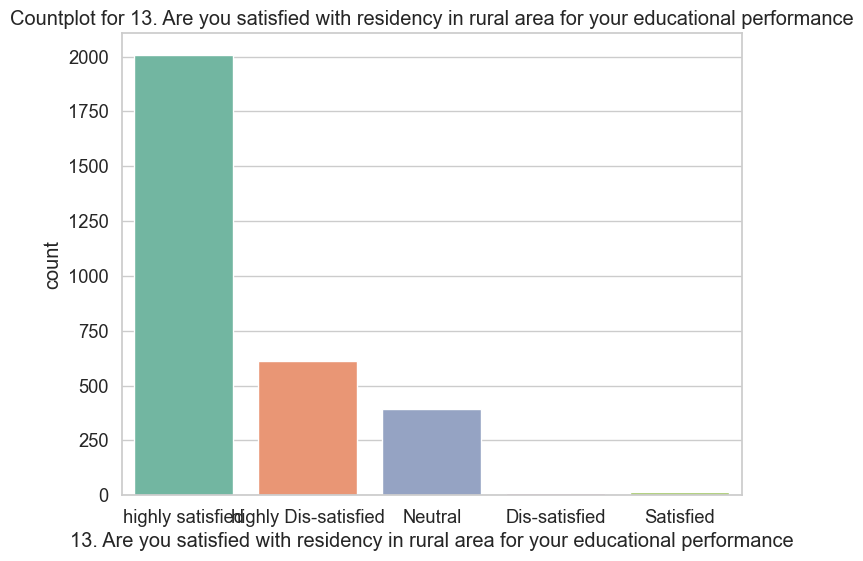

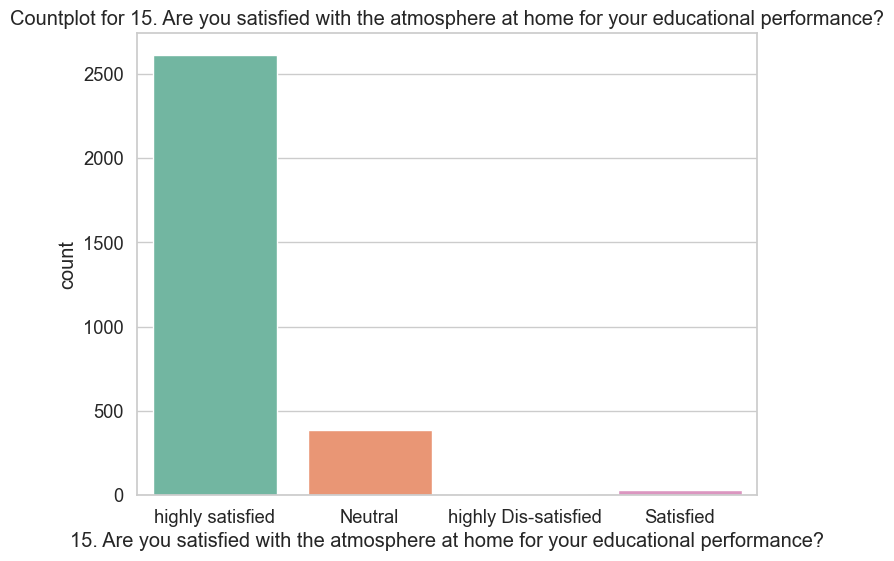

In [23]:
# Distribution of numerical features with colors
data.hist(figsize=(8, 8), color='skyblue')  # Adjust color as needed
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Countplot for categorical features with colors
categorical_features = list(data.columns)[1:]
palette = 'Set2'  # Choose a color palette

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data, hue=feature, palette=palette, legend=False)
    plt.title(f'Countplot for {feature}')
    plt.show()